In [1]:
%matplotlib inline

import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import scipy.optimize as op
import math as math
from sklearn import svm, datasets

# use seaborn plotting defaults
import seaborn as sns; sns.set()

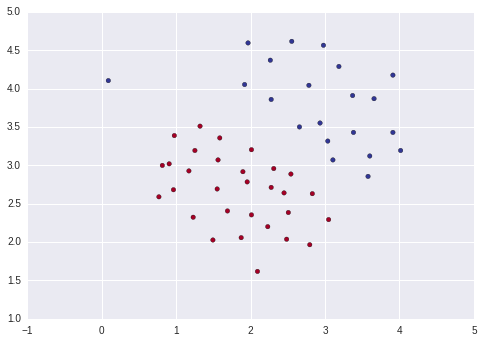

In [2]:
data = sio.loadmat('ex6data1.mat')
X = data['X']
y = data['y'].flatten()

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlBu')


([], <a list of 0 Text yticklabel objects>)

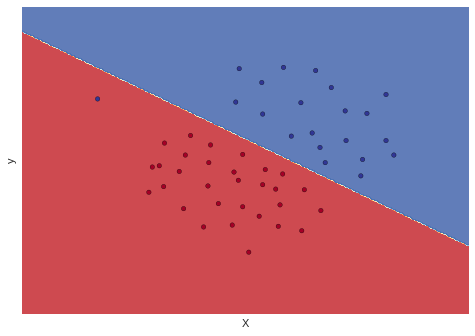

In [3]:
C = 1   # Regularization parameter
h = .02  # step size in the mesh

model = svm.LinearSVC(C = C)
model.fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.8)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)
plt.xlabel('X')
plt.ylabel('y')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

In [4]:
def gaussianKernel(Xi, Xj):

    gamma = 0.1

    fullResult = np.zeros([Xi.shape[0], Xj.shape[0]])
    
    newRow = np.array([])
    for xj_index, xj in enumerate(Xj):
        result = np.exp(-(np.sum((Xi - xj) ** 2, axis=1) / (2 * (gamma**2))))
        #fullResult = np.hstack((fullResult, result))
        fullResult[:, xj_index] = result
    return fullResult

# Custom kernel requires a paramter that is given to the svm constructor. I cannot find any documentation on how to
# access kernel parameters in the kernel from the svm object. This solution is to create the kernel function
# with the parameter hard coded in by its parent function 'makeGaussianKernel' before it is passed to the svm
# constructor. 
def makeGaussianKernel(gamma):
    def gaussianKernel(Xi, Xj):

        fullResult = np.zeros([Xi.shape[0], Xj.shape[0]])
    
        newRow = np.array([])
        for xj_index, xj in enumerate(Xj):
            result = np.exp(-(np.sum((Xi - xj) ** 2, axis=1) / (2 * (gamma**2))))
            #fullResult = np.hstack((fullResult, result))
            fullResult[:, xj_index] = result
        return fullResult
    
    return gaussianKernel


# These values are taken directly from the file ex6.m. This comes with the materials for Andrew Ng's course.  
# Result should be 0.324652 when bandwidthParam = 2
x1 = np.array([1, 2, 1]).reshape([1, 3])
x2 = np.array([0, 4, -1]).reshape([1, 3])
kernel = makeGaussianKernel(2)

print("Test Result: ", kernel(x1, x2))


Test Result:  [[ 0.32465247]]


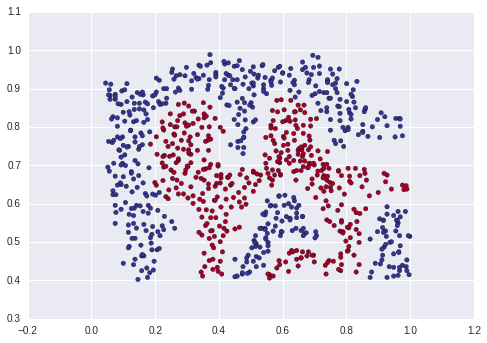

In [5]:
# Load and visulaize the data from the second dataset
dataset2 = sio.loadmat('ex6data2.mat')
X = dataset2['X']
y = dataset2['y'].flatten()

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlBu')


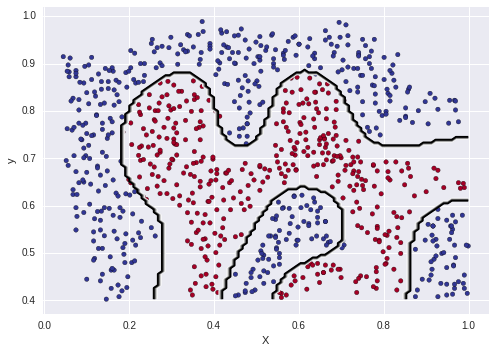

In [6]:
model = svm.SVC(kernel=makeGaussianKernel(0.1), C=1)
model.fit(X, y)

# Range over which the contour will be plotted
x1_plot = np.linspace(min(X[:,0]), max(X[:,0]), 100)
x2_plot = np.linspace(min(X[:,1]), max(X[:,1]), 100)

X1, X2 = np.meshgrid(x1_plot, x2_plot)
vals = np.zeros(X1.shape)

for i in range(X1.shape[0]):
    this_x = np.array([X1[:, i], X2[:, i]])
    vals[:, i] = model.predict(this_x.T)

# Plot also the training points and boundry
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)
plt.xlabel('X')
plt.ylabel('y')
plt.contour(X1, X2, vals)


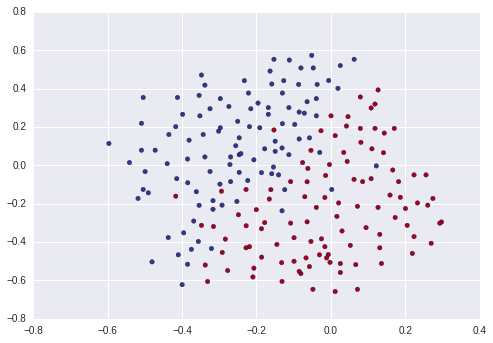

In [14]:
# Load and visulaize the data from the second dataset
dataset3 = sio.loadmat('ex6data3.mat')
X = dataset3['X']
y = dataset3['y'].flatten()
X_val =  dataset3['Xval']
y_val = dataset3['yval'].flatten()

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlBu')

# Finds the best combination of C and kernel parameter from the array of values 'searchValues'
def findParams():
    searchValues = np.array([0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30])
    
    scoreValues = np.zeros([searchValues.shape[0], searchValues.shape[0]])
    
    # Train an svm on the training data over every combination of C and kernel param for the searchvalues array
    for C_index, C in enumerate(searchValues):
        for kernelParam_index, kernelParam in enumerate(searchValues):
            
            # Train a model and use the cross validation data to calculate the error
            model = svm.SVC(kernel=makeGaussianKernel(kernelParam), C=C).fit(X, y)
            scoreValues[C_index, kernelParam_index] = model.score(X_val, y_val) 
    
    # Find the 2d index of the highest score value and return the corrisponding C and kernel parameter
    minValueIndex = np.unravel_index(scoreValues.argmax(), scoreValues.shape)        
    return searchValues[minValueIndex[0]], searchValues[minValueIndex[1]]


# Find the best C and kerel param and train an svm
C, kernelParam = findParams()
model = svm.SVC(kernel=makeGaussianKernel(kernelParam), C=C).fit(X, y)


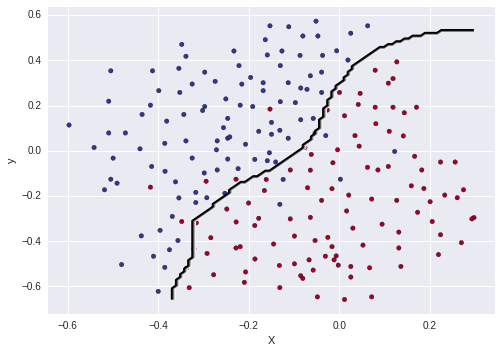

In [15]:
# Range over which the contour will be plotted
x1_plot = np.linspace(min(X[:,0]), max(X[:,0]), 100)
x2_plot = np.linspace(min(X[:,1]), max(X[:,1]), 100)

X1, X2 = np.meshgrid(x1_plot, x2_plot)
vals = np.zeros(X1.shape)

for i in range(X1.shape[0]):
    this_x = np.array([X1[:, i], X2[:, i]])
    vals[:, i] = model.predict(this_x.T)

# Plot also the training points and boundry
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)
plt.xlabel('X')
plt.ylabel('y')
plt.contour(X1, X2, vals)